<a href="https://colab.research.google.com/github/FiahIdris/GColab_Learning/blob/main/klasifikasi_motogp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
% cd /content/gdrive/My Drive/model_klasifikasi_motogp_rider

/content/gdrive/My Drive/model_klasifikasi_motogp_rider


In [ ]:
! ls dataset_motogp

test  train


# Eksplorasi Data

In [ ]:
import os

# eksplorasi direktori dataset
for dirpath, dirnames, filenames in os.walk('dataset_motogp'):
  print(f"Ada {len(dirnames)} direktori dan {len(filenames)} gambar didalam {dirpath}")

Ada 2 direktori dan 0 gambar didalam dataset_motogp
Ada 6 direktori dan 0 gambar didalam dataset_motogp/train
Ada 0 direktori dan 70 gambar didalam dataset_motogp/train/marquez
Ada 0 direktori dan 70 gambar didalam dataset_motogp/train/dovizioso
Ada 0 direktori dan 75 gambar didalam dataset_motogp/train/rossi
Ada 0 direktori dan 65 gambar didalam dataset_motogp/train/pedrosa
Ada 0 direktori dan 66 gambar didalam dataset_motogp/train/vinales
Ada 0 direktori dan 76 gambar didalam dataset_motogp/train/lorenzo
Ada 6 direktori dan 0 gambar didalam dataset_motogp/test
Ada 0 direktori dan 8 gambar didalam dataset_motogp/test/dovizioso
Ada 0 direktori dan 9 gambar didalam dataset_motogp/test/lorenzo
Ada 0 direktori dan 9 gambar didalam dataset_motogp/test/marquez
Ada 0 direktori dan 9 gambar didalam dataset_motogp/test/pedrosa
Ada 0 direktori dan 9 gambar didalam dataset_motogp/test/rossi
Ada 0 direktori dan 9 gambar didalam dataset_motogp/test/vinales


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("dataset_motogp/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['dovizioso' 'lorenzo' 'marquez' 'pedrosa' 'rossi' 'vinales']


In [ ]:
# view image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  # ambil sembarang image
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img);
  plt.title(target_class);
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img

Image shape: (533, 800, 3)


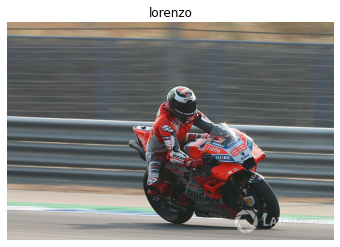

In [ ]:
img = view_random_image(target_dir='dataset_motogp/test/',
                        target_class='lorenzo')

# Image Data Generator

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(46)

# preprocess data
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

# augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_dir = 'dataset_motogp/train/'
test_dir = 'dataset_motogp/test/'

# set data generator
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(256, 256),
                                               class_mode='categorical',
                                               seed=46)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(256, 256),
                                               class_mode='categorical',
                                               seed=46)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               target_size=(256, 256),
                                               class_mode='categorical',
                                               seed=46)

Found 403 images belonging to 6 classes.
Found 403 images belonging to 6 classes.
Found 51 images belonging to 6 classes.


In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

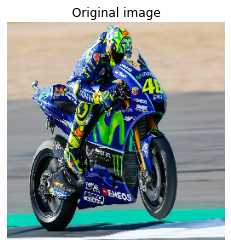

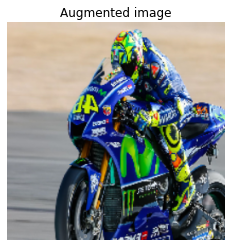

In [ ]:
# Original vs Augmented
random_number = random.randint(0,5)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
from tensorflow.python.keras.layers.convolutional import Conv
# buat CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(16, 3, activation='relu', input_shape=(256, 256, 3)))
model.add(Dropout(0.2))
model.add(MaxPool2D(2))
model.add(Conv2D(32, 3, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))
# mutually exclusive : 1 kelas yg benar
# compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# training
history = model.fit(train_data_augmented,
                    epochs=30,
                    validation_data=valid_data)

Epoch 1/30
13/13 [==============================] - 21s 1s/step - loss: 1.9269 - accuracy: 0.1861 - val_loss: 1.7899 - val_accuracy: 0.1765
Epoch 2/30
13/13 [==============================] - 17s 1s/step - loss: 1.7965 - accuracy: 0.1836 - val_loss: 1.7918 - val_accuracy: 0.1569
Epoch 3/30
13/13 [==============================] - 19s 1s/step - loss: 1.7907 - accuracy: 0.2109 - val_loss: 1.7914 - val_accuracy: 0.2157
Epoch 4/30
13/13 [==============================] - 19s 1s/step - loss: 1.7892 - accuracy: 0.1861 - val_loss: 1.7895 - val_accuracy: 0.3137
Epoch 5/30
13/13 [==============================] - 23s 2s/step - loss: 1.7620 - accuracy: 0.2283 - val_loss: 1.7672 - val_accuracy: 0.2745
Epoch 6/30
13/13 [==============================] - 18s 1s/step - loss: 1.6639 - accuracy: 0.2407 - val_loss: 1.5285 - val_accuracy: 0.3333
Epoch 7/30
13/13 [==============================] - 23s 2s/step - loss: 1.5632 - accuracy: 0.3201 - val_loss: 1.5713 - val_accuracy: 0.2745
Epoch 8/30
13/13 [==

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

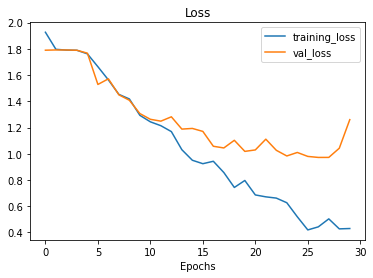

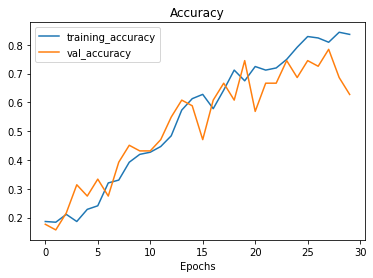

In [ ]:
plot_loss_curves(history)

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [ ]:
from google.colab import files
files.upload()

Saving vinales_750f910.jpg to vinales_750f910.jpg


{'vinales_750f910.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00d\x00d\x00\x00\xff\xdb\x00C\x00\x04\x03\x03\x04\x03\x03\x04\x04\x04\x04\x05\x05\x04\x05\x07\x0b\x07\x07\x06\x06\x07\x0e\n\n\x08\x0b\x10\x0e\x11\x11\x10\x0e\x10\x0f\x12\x14\x1a\x16\x12\x13\x18\x13\x0f\x10\x16\x1f\x17\x18\x1b\x1b\x1d\x1d\x1d\x11\x16 "\x1f\x1c"\x1a\x1c\x1d\x1c\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\r\x07\x07\r\x1c\x12\x10\x12\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\xff\xc0\x00\x11\x08\x01\xf2\x03\xe4\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x01\x04\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x01\x03\x04\x05\x00\x06\x07\x08\t\xff\xc4\x00T\x10\x00\x01\x02\x04\x03\x05\x05\x04\x06\x07\x05\x05\x07\x03\x03\x05\x01\x02\x03\x00\x04\x05\x11\x06\x12!\x07\x131AQ\x14"2aq\x15BR\x81\x08#b\x91\xa1\xb1\x163r\x82\x92\xc1\x

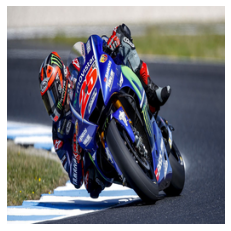

In [ ]:
from PIL import Image
new_img = Image.open('vinales_750f910.jpg')
new_img = new_img.resize((256,256), Image.ANTIALIAS)
plt.imshow(new_img);
plt.axis(False);

In [ ]:
new_img = tf.expand_dims(np.array(new_img), axis=0)
res = model.predict(new_img)

In [ ]:
res.argmax()

5

In [ ]:
train_data.class_indices

{'dovizioso': 0,
 'lorenzo': 1,
 'marquez': 2,
 'pedrosa': 3,
 'rossi': 4,
 'vinales': 5}

# Fine Tuning

In [ ]:
import tensorflow as tf
base_model = tf.keras.applications.resnet_v2.ResNet50V2(input_shape=(256, 256, 3),
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
base_model.trainable = False


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, BatchNormalization, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
layer_1 = Dense(15)
prediction_layer = tf.keras.layers.Dense(6)
softmax = Activation('softmax')

inputs = tf.keras.Input(shape=(256, 256, 3))
x = base_model(inputs, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = layer_1(x)
outputs = prediction_layer(x)
outputs = softmax(outputs)

model = tf.keras.Model(inputs, outputs)

model.compile(loss="categorical_crossentropy",
                optimizer="rmsprop",
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_data,
                        epochs=30,
                        validation_data=valid_data)

Epoch 1/30
13/13 [==============================] - 26s 2s/step - loss: 2.1342 - accuracy: 0.2333 - val_loss: 1.7699 - val_accuracy: 0.3333
Epoch 2/30
13/13 [==============================] - 19s 1s/step - loss: 1.5188 - accuracy: 0.4367 - val_loss: 1.6490 - val_accuracy: 0.2745
Epoch 3/30
13/13 [==============================] - 19s 1s/step - loss: 1.3039 - accuracy: 0.4913 - val_loss: 1.4210 - val_accuracy: 0.4510
Epoch 4/30
13/13 [==============================] - 20s 1s/step - loss: 1.0627 - accuracy: 0.6377 - val_loss: 1.2837 - val_accuracy: 0.4902
Epoch 5/30
13/13 [==============================] - 19s 1s/step - loss: 0.8937 - accuracy: 0.6501 - val_loss: 1.3152 - val_accuracy: 0.5294
Epoch 6/30
13/13 [==============================] - 19s 1s/step - loss: 0.8103 - accuracy: 0.7444 - val_loss: 1.3572 - val_accuracy: 0.5098
Epoch 7/30
13/13 [==============================] - 19s 1s/step - loss: 0.6935 - accuracy: 0.7667 - val_loss: 1.1142 - val_accuracy: 0.5686
Epoch 8/30
13/13 [==

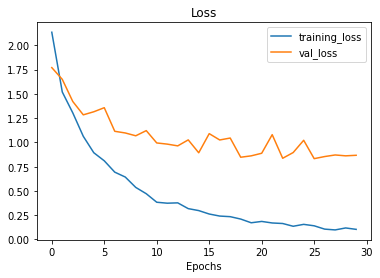

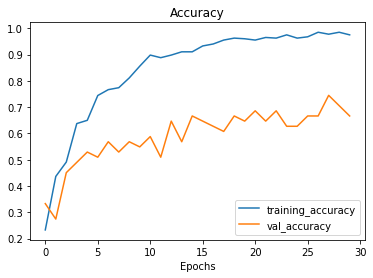

In [ ]:
plot_loss_curves(history)